In [3]:
import pandas as pd

file_path = "/laptop_price - dataset.csv"
df = pd.read_csv(file_path)
df.head()


,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,NaN,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,NaN


In [4]:
# Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)


Company                 0
Product                 0
TypeName                0
Inches                 20
ScreenResolution        0
CPU_Company             0
CPU_Type               19
CPU_Frequency (GHz)     0
RAM (GB)                0
Memory                  0
GPU_Company             0
GPU_Type                0
OpSys                   0
Weight (kg)             0
Price (Euro)           15
dtype: int64


In [5]:
# Impute with mean
df['Inches'] = df['Inches'].fillna(df['Inches'].mean())

# Impute with median
df['Price (Euro)'] = df['Price (Euro)'].fillna(df['Price (Euro)'].median())

# Impute with mode
df['CPU_Type'] = df['CPU_Type'].fillna(df['CPU_Type'].mode()[0])


# Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)

df.head()

Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64


,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.300000,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.300000,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.021594,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.400000,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.300000,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,989.00


In [6]:
# Scaling of Data

import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select only numerical features for scaling
numerical_features = df.select_dtypes(include=['number']).columns
numerical_df = df[numerical_features]

# 1. Standardization (Z-Score Scaling)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(numerical_df)
print("Standardized Data:\n", data_standardized)

# 2. Min-Max Scaling
minmax_scaler = MinMaxScaler()
data_minmax = minmax_scaler.fit_transform(numerical_df)
print("Min-Max Scaled Data:\n", data_minmax)

Standardized Data:
 [[-1.21436713e+00 -5.91760846e-03 -8.64993649e-02 -1.00237990e+00
   2.96301635e-01]
 [-1.21436713e+00 -9.98674290e-01 -8.64993649e-02 -1.04722741e+00
  -3.37263634e-01]
 [ 1.25299567e-15  3.91185064e-01 -8.64993649e-02 -2.69870610e-01
  -8.02917936e-01]
 ...
 [-7.20605433e-01 -1.39577696e+00 -1.26393734e+00 -8.08040701e-01
  -1.30028284e+00]
 [ 4.07992734e-01  3.91185064e-01 -4.78978689e-01  2.23451974e-01
  -5.31235949e-01]
 [ 4.07992734e-01 -1.39577696e+00 -8.71458014e-01  2.38401143e-01
  -1.09903693e+00]]
Min-Max Scaled Data:
 [[0.38554217 0.51851852 0.09677419 0.16957606 0.19674093]
 [0.38554217 0.33333333 0.09677419 0.16209476 0.12235274]
 [0.59296309 0.59259259 0.09677419 0.29177057 0.06767932]
 ...
 [0.46987952 0.25925926 0.         0.20199501 0.0092827 ]
 [0.6626506  0.59259259 0.06451613 0.37406484 0.09957806]
 [0.6626506  0.25925926 0.03225806 0.3765586  0.03291139]]


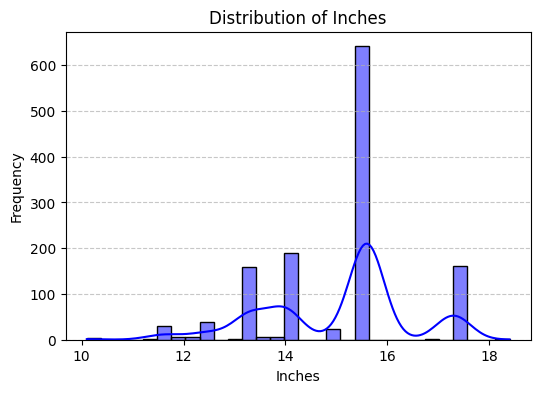

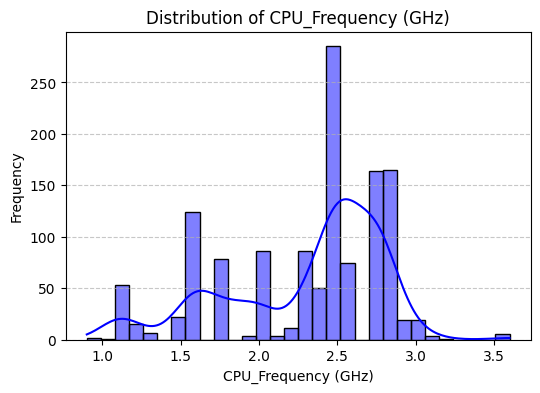

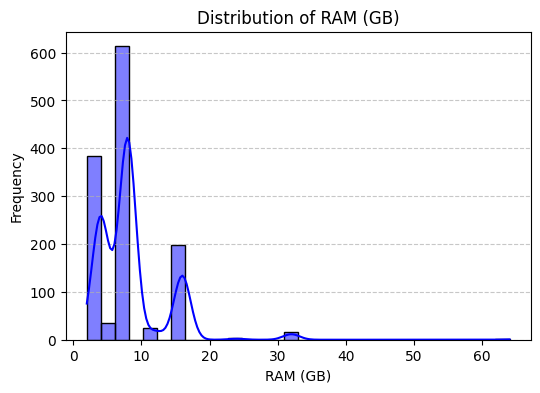

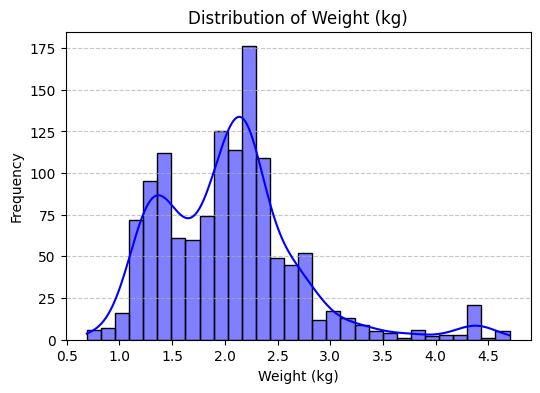

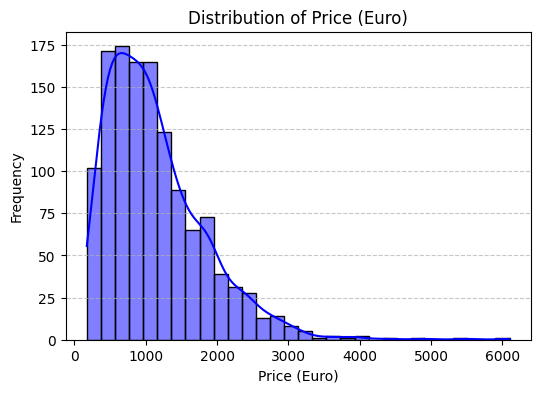

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Plot histograms for understanding about the noise
numerical_columns = ['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)', 'Price (Euro)']
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

     Company                              Product            TypeName  \
0      Apple                          MacBook Pro           Ultrabook   
1      Apple                          Macbook Air           Ultrabook   
2         HP                               250 G6            Notebook   
3      Apple                          MacBook Pro           Ultrabook   
4      Apple                          MacBook Pro           Ultrabook   
...      ...                                  ...                 ...   
1270  Lenovo                       Yoga 500-14ISK  2 in 1 Convertible   
1271  Lenovo                       Yoga 900-13ISK  2 in 1 Convertible   
1272  Lenovo                   IdeaPad 100S-14IBR            Notebook   
1273      HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon            Notebook   
1274    Asus  X553SA-XX031T (N3050/4GB/500GB/W10)            Notebook   

         Inches                            ScreenResolution CPU_Company  \
0     13.300000          IPS Panel Retina Displa

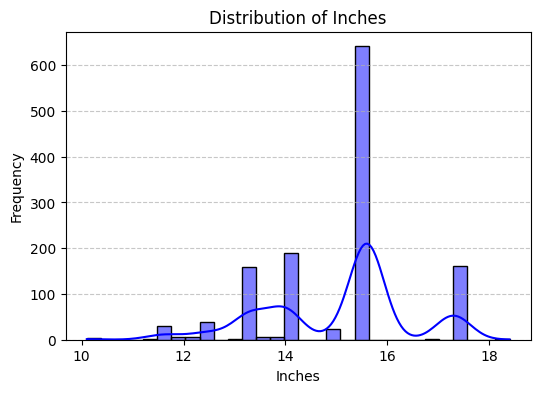

In [8]:
import pandas as pd
import numpy as np

np.random.seed(42)


# Generate random noise
# Gaussian noise with mean=0 and standard deviation=0.5
noise = np.random.normal(0, 0.5, size=df['Inches'].shape)


# Inject noise
df['Inches_noisy'] = df['Inches'] + noise

print(df)

numerical_columns = ['Inches']
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

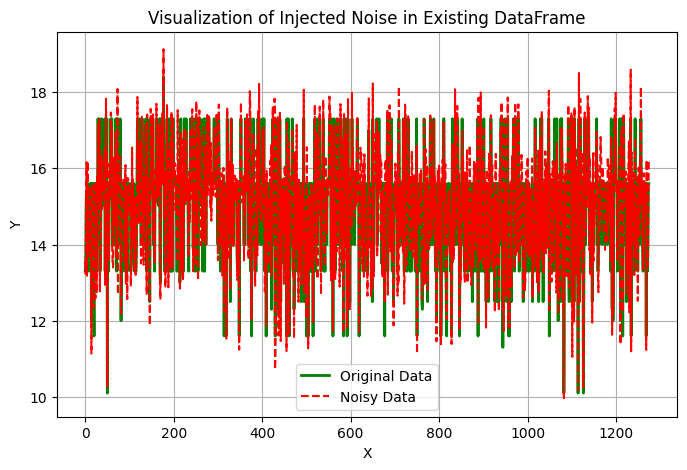

In [9]:
# Visualize Original Data, Noisy Data, and the Noise
plt.figure(figsize=(8, 5))


plt.plot(df['Inches'], label='Original Data', linewidth=2, color='green')

plt.plot(df['Inches_noisy'], label='Noisy Data', linestyle='--', color='red')

# Highlight noise (difference between original and noisy)
# plt.scatter(df['Inches'], noise, label='Injected Noise', alpha=0.6, color='blue', marker='x')

# Add labels, legend, and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Visualization of Injected Noise in Existing DataFrame')
plt.legend()
plt.grid(True)


plt.show()


In [10]:
# Removal of noise using Interquartile method
Q1 = df['Inches_noisy'].quantile(0.25)
Q3 = df['Inches_noisy'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Inches_cleaned'] = df['Inches_noisy'].clip(lower=lower_bound, upper=upper_bound)



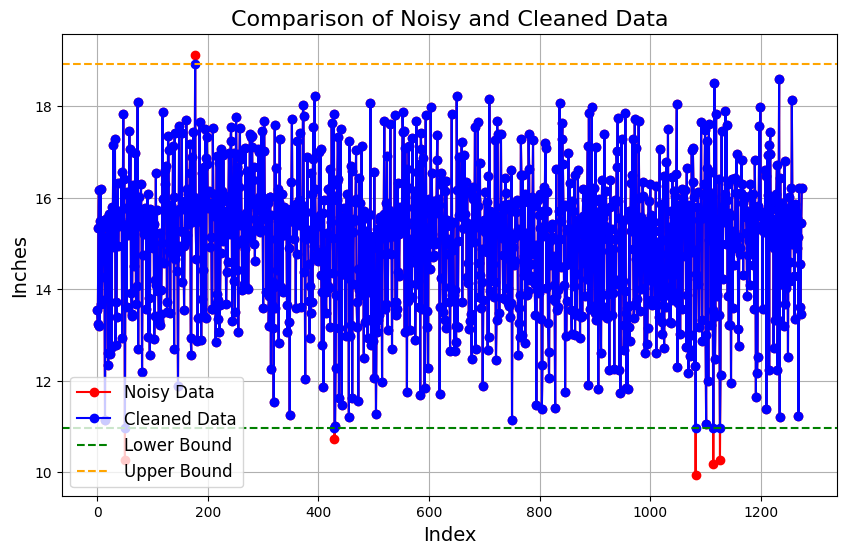

In [11]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Inches_noisy'], 'o-', label='Noisy Data', color='red')
plt.plot(df.index, df['Inches_cleaned'], 'o-', label='Cleaned Data', color='blue')
plt.title('Comparison of Noisy and Cleaned Data', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Inches', fontsize=14)
plt.axhline(y=lower_bound, color='green', linestyle='--', label='Lower Bound')
plt.axhline(y=upper_bound, color='orange', linestyle='--', label='Upper Bound')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

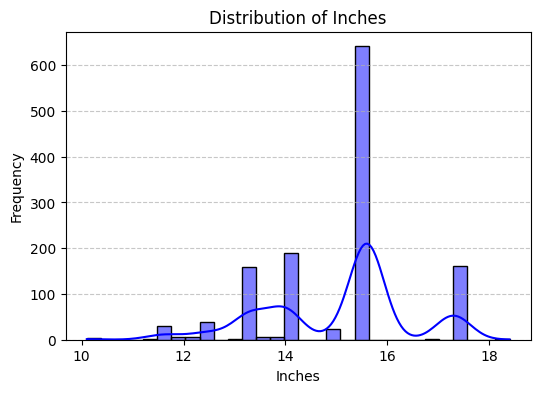

In [12]:
numerical_columns = ['Inches']
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [13]:
import pandas as pd
import numpy as np
from scipy import stats

# Z-scores for the 'Inches' column
z_scores = stats.zscore(df['Inches'])
outliers_indices = np.where(np.abs(z_scores) > 3)[0]

outliers = df.iloc[outliers_indices]

print("Outliers detected in 'Inches':")
print(outliers)

Outliers detected in 'Inches':
     Company    Product            TypeName  Inches  \
50    Lenovo  Yoga Book  2 in 1 Convertible    10.1   
1082  Lenovo  Yoga Book  2 in 1 Convertible    10.1   
1114  Lenovo  Yoga Book  2 in 1 Convertible    10.1   
1126  Lenovo  Yoga Book  2 in 1 Convertible    10.1   

                     ScreenResolution CPU_Company       CPU_Type  \
50    IPS Panel Touchscreen 1920x1200       Intel  Atom x5-Z8550   
1082  IPS Panel Touchscreen 1920x1200       Intel  Atom x5-Z8550   
1114  IPS Panel Touchscreen 1920x1200       Intel  Atom x5-Z8550   
1126  IPS Panel Touchscreen 1920x1200       Intel  Atom x5-Z8550   

      CPU_Frequency (GHz)  RAM (GB)              Memory GPU_Company  \
50                   1.44         4  64GB Flash Storage       Intel   
1082                 1.44         4  64GB Flash Storage       Intel   
1114                 1.44         4  64GB Flash Storage       Intel   
1126                 1.44         4  64GB Flash Storage       Intel 

In [14]:
len(outliers)

4

In [15]:
df_no_outliers = df.drop(outliers_indices)
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),Inches_noisy,Inches_cleaned
0,Apple,MacBook Pro,Ultrabook,13.300000,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,13.548357,13.548357
1,Apple,Macbook Air,Ultrabook,13.300000,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94,13.230868,13.230868
2,HP,250 G6,Notebook,15.021594,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00,15.345438,15.345438
3,Apple,MacBook Pro,Ultrabook,15.400000,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45,16.161515,16.161515
4,Apple,MacBook Pro,Ultrabook,13.300000,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,989.00,13.182923,13.182923


In [16]:
df.isnull().sum()
df.dtypes

,0
Company,object
Product,object
TypeName,object
Inches,float64
ScreenResolution,object
CPU_Company,object
CPU_Type,object
CPU_Frequency (GHz),float64
RAM (GB),int64
Memory,object


In [17]:
from sklearn.preprocessing import LabelEncoder

df_new= df.drop(columns= ['Company','ScreenResolution', 'Product', 'CPU_Company', 'Memory', 'CPU_Type', 'GPU_Company', 'GPU_Type', 'Inches_cleaned', 'Inches_noisy'])
label_encoder = LabelEncoder()

df_new['TypeName_encoded'] = label_encoder.fit_transform(df['TypeName'])
df_new['OpSys_encoded'] = label_encoder.fit_transform(df['OpSys'])

df_new

,TypeName,Inches,CPU_Frequency (GHz),RAM (GB),OpSys,Weight (kg),Price (Euro),TypeName_encoded,OpSys_encoded
0,Ultrabook,13.300000,2.3,8,macOS,1.37,1339.69,4,8
1,Ultrabook,13.300000,1.8,8,macOS,1.34,898.94,4,8
2,Notebook,15.021594,2.5,8,No OS,1.86,575.00,3,4
3,Ultrabook,15.400000,2.7,16,macOS,1.83,2537.45,4,8
4,Ultrabook,13.300000,3.1,8,macOS,1.37,989.00,4,8
...,...,...,...,...,...,...,...,...,...
1270,2 in 1 Convertible,14.000000,2.5,4,Windows 10,1.80,638.00,0,5
1271,2 in 1 Convertible,13.300000,2.5,16,Windows 10,1.30,1499.00,0,5
1272,Notebook,14.000000,1.6,2,Windows 10,1.50,229.00,3,5
1273,Notebook,15.600000,2.5,6,Windows 10,2.19,764.00,3,5


In [18]:
# 1. Filter Method (Correlation)
X = df_new.drop(["Price (Euro)", "TypeName", "OpSys"], axis=1)
y = df_new["Price (Euro)"]

X.corr()


,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),TypeName_encoded,OpSys_encoded
Inches,1.000000,0.299734,0.231347,0.817149,-0.081373,0.043203
CPU_Frequency (GHz),0.299734,1.000000,0.366254,0.318649,-0.082810,0.219762
RAM (GB),0.231347,0.366254,1.000000,0.389370,-0.242265,0.140002
Weight (kg),0.817149,0.318649,0.389370,1.000000,-0.275440,0.011309
TypeName_encoded,-0.081373,-0.082810,-0.242265,-0.275440,1.000000,0.090069
OpSys_encoded,0.043203,0.219762,0.140002,0.011309,0.090069,1.000000


In [19]:
# 2. Wrapper Methods (Recursive Feature Elimination)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()


rfe = RFE(estimator=model)
rfe.fit(X_train, y_train)

selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)



model.fit(X_train, y_train)
score = model.score(X_test, y_test)

print(f"Model R^2 Score with Selected Features: {score:.4f}")

Selected Features: Index(['CPU_Frequency (GHz)', 'RAM (GB)', 'OpSys_encoded'], dtype='object')
Model R^2 Score with Selected Features: 0.6469


In [20]:
# 3. Embedded Methods (Lasso regression)

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train_scaled, y_train)


score = lasso.score(X_test_scaled, y_test)
print(f"\nModel R^2 Score: {score:.4f}")


Model R^2 Score: 0.6469
